In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1=pd.read_csv("FinalProject2.csv")
df1.head()

,area_type,availability,society,location,size,total_sqft,bath,balcony,price
0,residential,Ready To Move 31-Jan,GOOD,sec 1,3 BHK,1200,3,2,20000
1,residential,Ready To Move 31-Jan,GOOD,sec 2,3 BHK,1200,3,2,20000
2,residential,Ready To Move,GOOD,sec 3,3 BHK,1200,3,2,21000
3,non-residential,Ready To Move,GOOD,sec 4,2 BHK,800,2,1,12000
4,non-residential,Ready To Move,GOOD,sec 13,2 BHK,800,2,1,12500


In [3]:
df1.shape

(14304, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
COMMECIAL             96
COMMERCIAL           384
NON-residential       96
non-residential     2688
residential        11040
Name: area_type, dtype: int64

In [5]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,sec 1,3 BHK,1200,3,20000
1,sec 2,3 BHK,1200,3,20000
2,sec 3,3 BHK,1200,3,21000
3,sec 4,2 BHK,800,2,12000
4,sec 13,2 BHK,800,2,12500


In [6]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3.shape

(14304, 5)

In [9]:
df3['size'].unique()

array(['3 BHK', '2 BHK', '1 bedroom', '3 Bedroom', '1 BHK', '4 BHK',
       '3 BHK ', '7 BHK', '10 BHK', '5 BHK', '6 BHK', '8 BHK', ' 2BHK'],
      dtype=object)

In [10]:
df3['bhk']=df3['size'].apply(lambda x: x.split(' ')[0])
df3.head()

,location,size,total_sqft,bath,price,bhk
0,sec 1,3 BHK,1200,3,20000,3
1,sec 2,3 BHK,1200,3,20000,3
2,sec 3,3 BHK,1200,3,21000,3
3,sec 4,2 BHK,800,2,12000,2
4,sec 13,2 BHK,800,2,12500,2


In [11]:
df3['bhk'].unique()

array(['3', '2', '1', '4', '7', '10', '5', '6', '8', ''], dtype=object)

In [12]:
df3.total_sqft.unique()

array(['1200', '800', '1050', '750', '700', '1150', '1250', '1000', '850',
       '1100', '800-850', '400', '950', '900-950', '450', '1300', '650',
       '900', '2500', '2400', '2450', '2350', '1650', '1750', '2600',
       '2250', '1520', '1400', '1500', '2200'], dtype=object)

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
29,sec 1,2 BHK,800-850,2,14000,2
49,sec 1,2 BHK,800-850,2,13000,2
50,sec 1,1 BHK,900-950,2,14000,1
178,sec 1,2 BHK,800-850,2,14000,2
198,sec 1,2 BHK,800-850,2,13000,2


In [16]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,sec 1,3 BHK,1200.0,3,20000,3
1,sec 2,3 BHK,1200.0,3,20000,3
2,sec 3,3 BHK,1200.0,3,21000,3
3,sec 4,2 BHK,800.0,2,12000,2
4,sec 13,2 BHK,800.0,2,12500,2


In [18]:
df4.loc[250]

location      sec 14
size           3 BHK
total_sqft       900
bath               0
price          14500
bhk                3
Name: 250, dtype: object

In [19]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,sec 1,3 BHK,1200.0,3,20000,3
1,sec 2,3 BHK,1200.0,3,20000,3
2,sec 3,3 BHK,1200.0,3,21000,3
3,sec 4,2 BHK,800.0,2,12000,2
4,sec 13,2 BHK,800.0,2,12500,2
5,sec 6,2 BHK,800.0,2,13000,2
6,sec 7,2 BHK,800.0,2,13000,2
7,sec 8,3 BHK,1050.0,2,18000,3
8,sec 11,2 BHK,750.0,2,10500,2
9,sec 10,2 BHK,800.0,3,13000,2


In [20]:
df5=df4.copy()
df5['rent_per_sqft']=df5['price']/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,rent_per_sqft
0,sec 1,3 BHK,1200.0,3,20000,3,16.666667
1,sec 2,3 BHK,1200.0,3,20000,3,16.666667
2,sec 3,3 BHK,1200.0,3,21000,3,17.500000
3,sec 4,2 BHK,800.0,2,12000,2,15.000000
4,sec 13,2 BHK,800.0,2,12500,2,15.625000


In [21]:
df5.location.unique()

array(['sec 1', 'sec 2', 'sec 3', 'sec 4 ', 'sec 13', 'sec 6', 'sec 7',
       'sec 8', 'sec 11', 'sec 10', 'sec 14', 'sec6', 'sec13', 'sec 12'],
      dtype=object)

In [22]:
len(df5.location.unique())

14

In [23]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
sec 2     2496
sec 10    1920
sec 6     1728
sec 1     1728
sec 8     1056
sec 7     1056
sec 4      960
sec 14     960
sec 13     960
sec 11     768
sec 12     288
sec 3      192
sec6        96
sec13       96
Name: location, dtype: int64

In [30]:
len(location_stats[location_stats<=5])

0

In [25]:
location_less_than_5 = location_stats[location_stats<=5]
location_less_than_5

Series([], Name: location, dtype: int64)

In [26]:
len(df5.location.unique())

14

In [27]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_less_than_5 else x)
len(df5.location.unique())

14

In [28]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,rent_per_sqft
0,sec 1,3 BHK,1200.0,3,20000,3,16.666667
1,sec 2,3 BHK,1200.0,3,20000,3,16.666667
2,sec 3,3 BHK,1200.0,3,21000,3,17.500000
3,sec 4,2 BHK,800.0,2,12000,2,15.000000
4,sec 13,2 BHK,800.0,2,12500,2,15.625000
5,sec 6,2 BHK,800.0,2,13000,2,16.250000
6,sec 7,2 BHK,800.0,2,13000,2,16.250000
7,sec 8,3 BHK,1050.0,2,18000,3,17.142857
8,sec 11,2 BHK,750.0,2,10500,2,14.000000
9,sec 10,2 BHK,800.0,3,13000,2,16.250000


In [36]:
df5.shape

(14304, 7)

In [40]:
type(df5.bhk)

pandas.core.series.Series

In [48]:
df5.rent_per_sqft.describe()

count    14304.000000
mean        15.456900
std          3.247568
min          1.315789
25%         13.000000
50%         15.294118
75%         17.333333
max         28.750000
Name: rent_per_sqft, dtype: float64

In [50]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.rent_per_sqft)
        st = np.std(subdf.rent_per_sqft)
        reduced_df = subdf[(subdf.rent_per_sqft>(m-st)) & (subdf.rent_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(9888, 7)

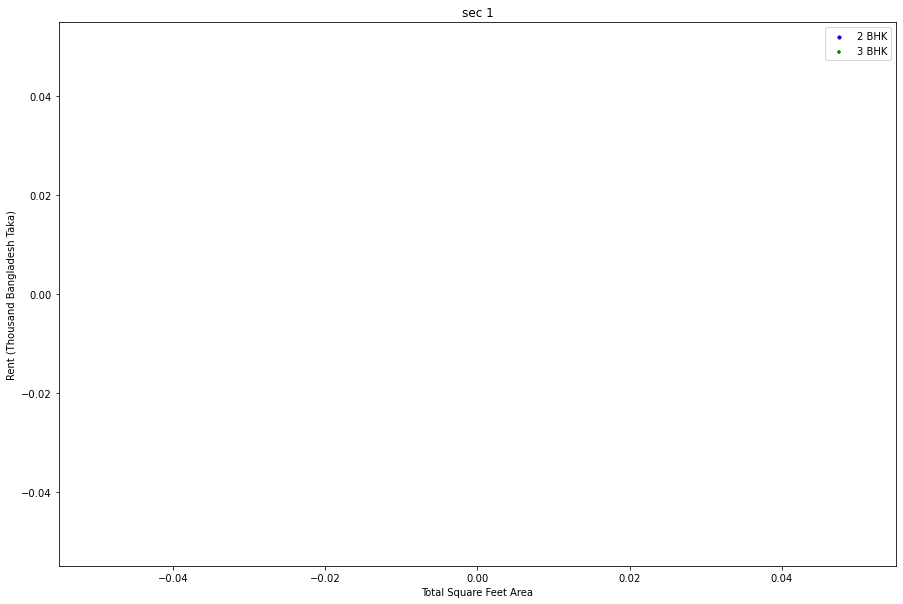

In [67]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=10)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=10)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Rent (Thousand Bangladesh Taka)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,'sec 1')

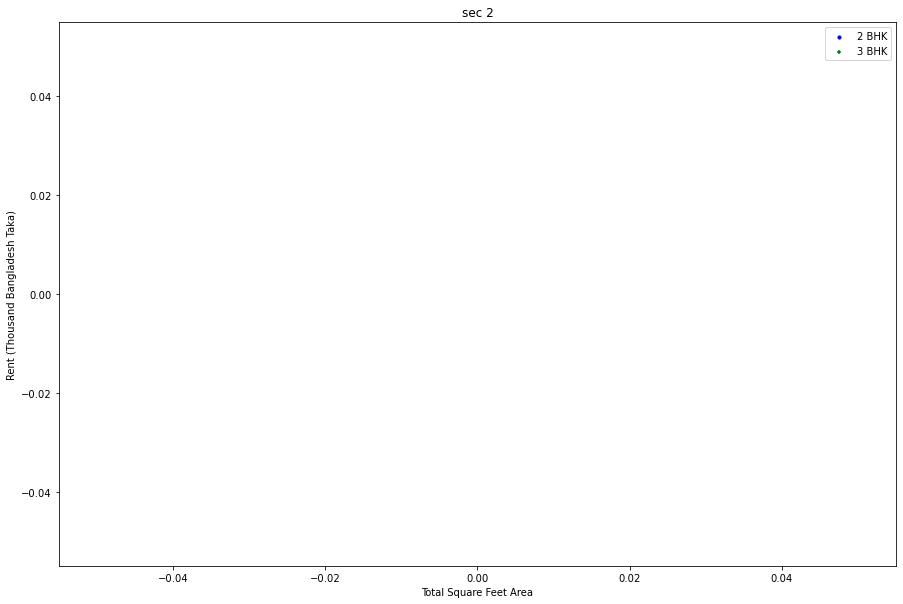

In [68]:
plot_scatter_chart(df6,'sec 2')

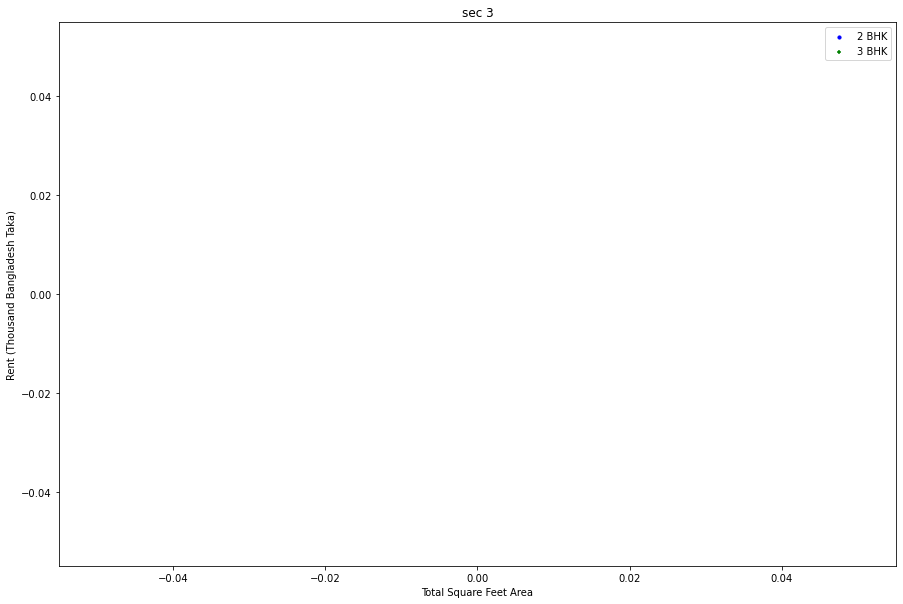

In [69]:
plot_scatter_chart(df6,'sec 3')

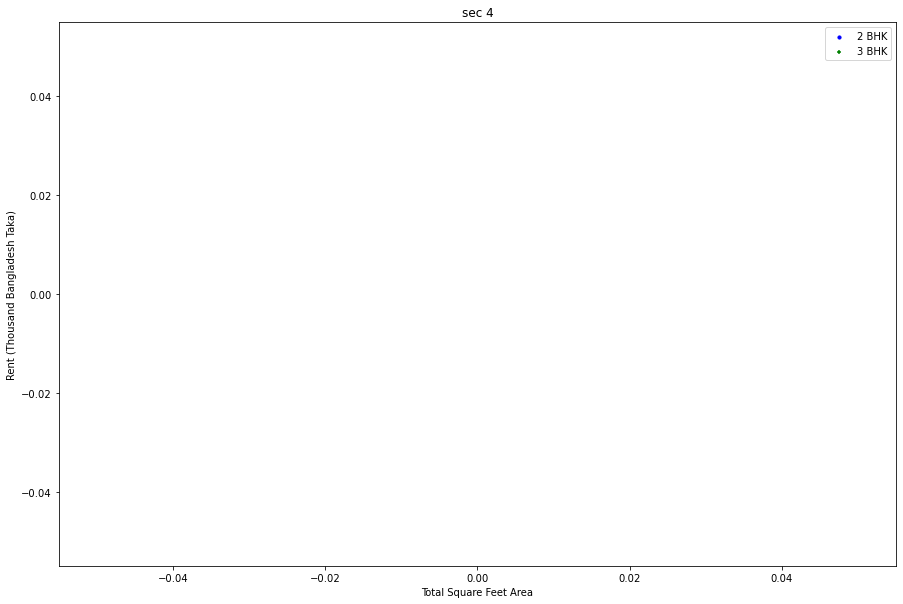

In [70]:
plot_scatter_chart(df6,'sec 4')

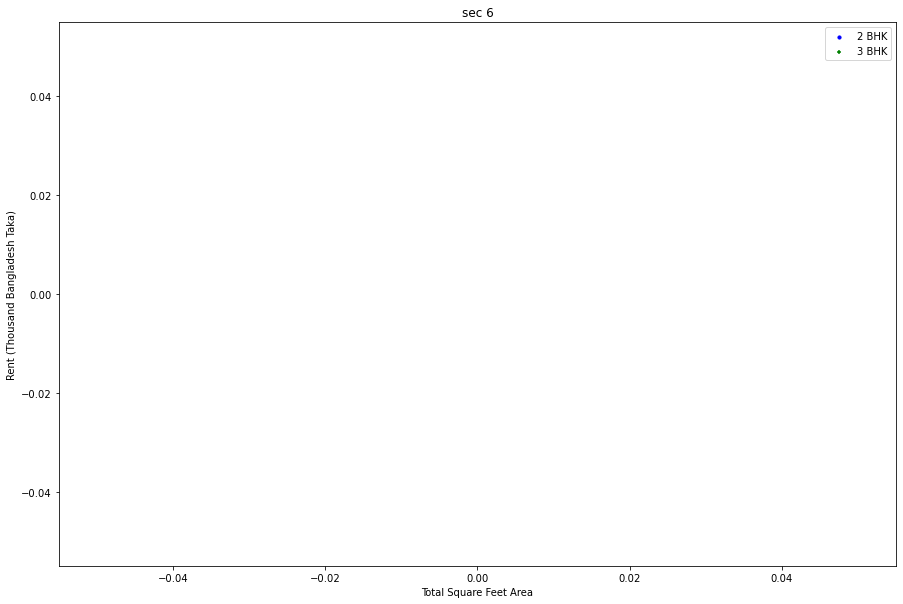

In [71]:
plot_scatter_chart(df6,'sec 6')

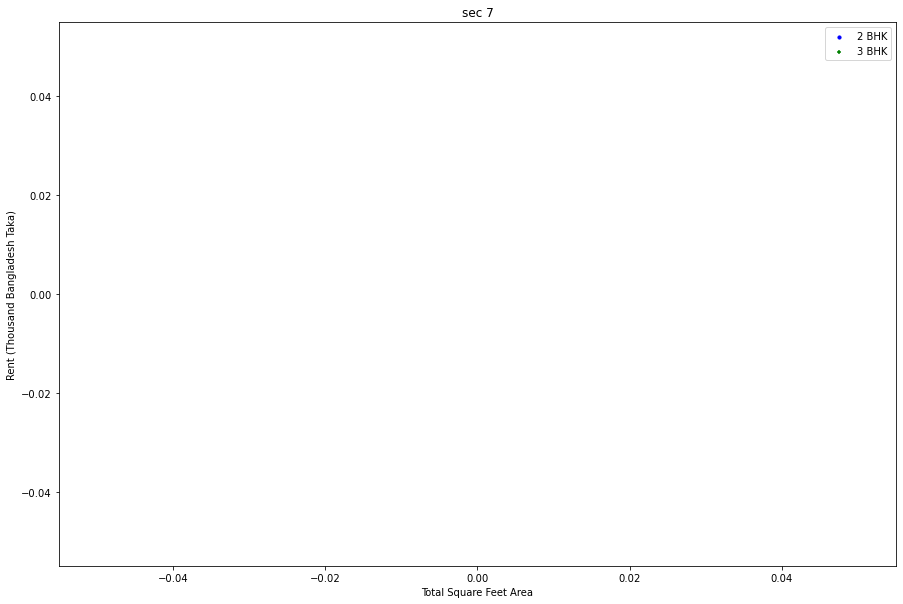

In [72]:
plot_scatter_chart(df6,'sec 7')

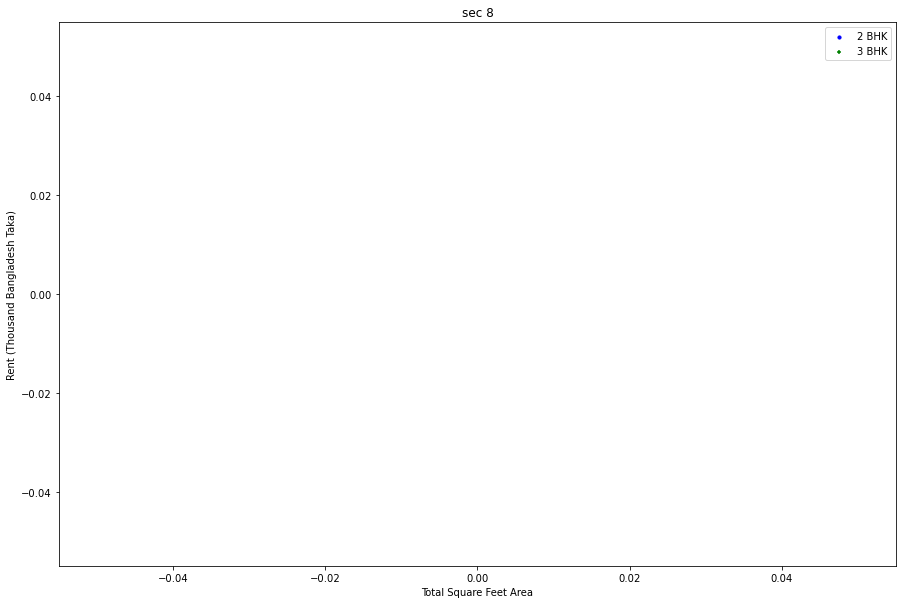

In [73]:
plot_scatter_chart(df6,'sec 8')

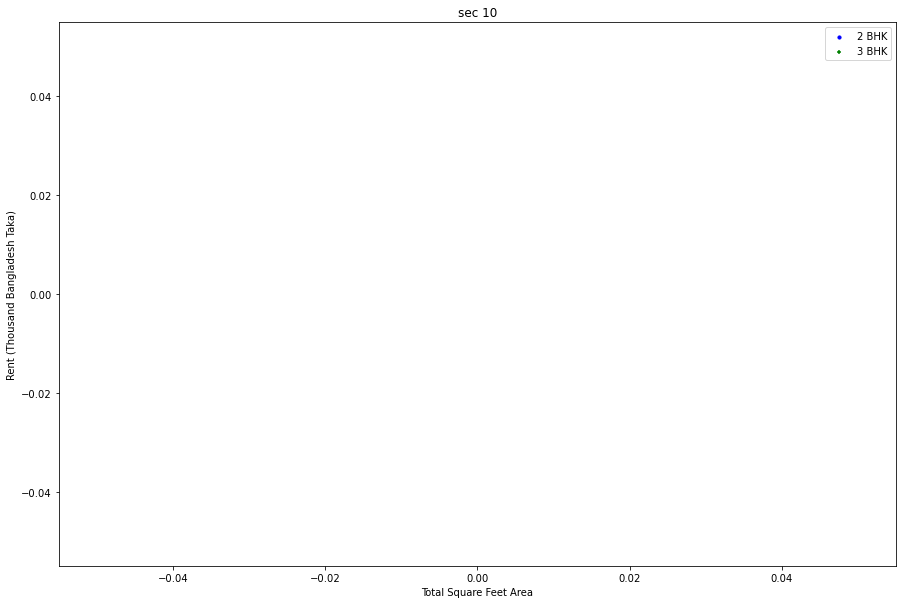

In [74]:
plot_scatter_chart(df6,'sec 10')

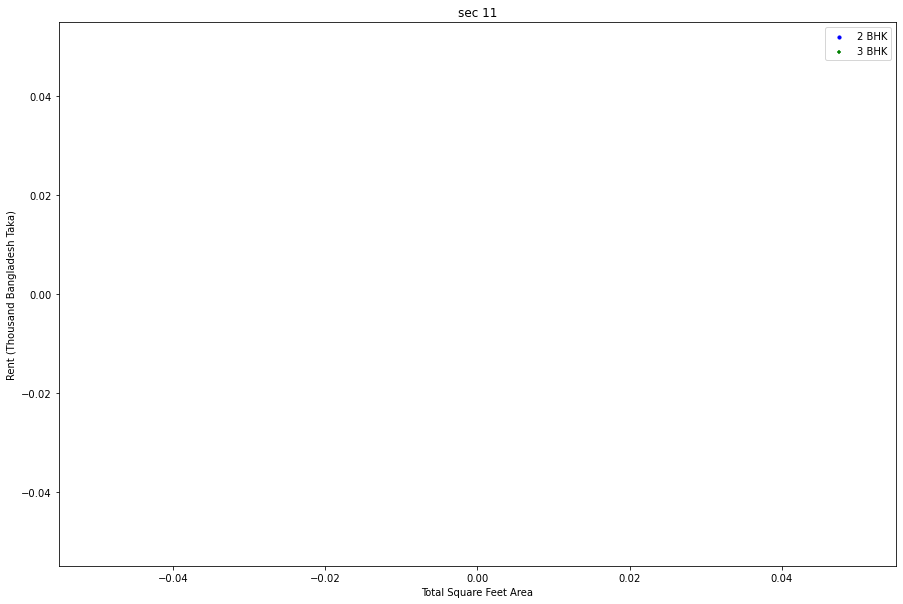

In [75]:
plot_scatter_chart(df6,'sec 11')

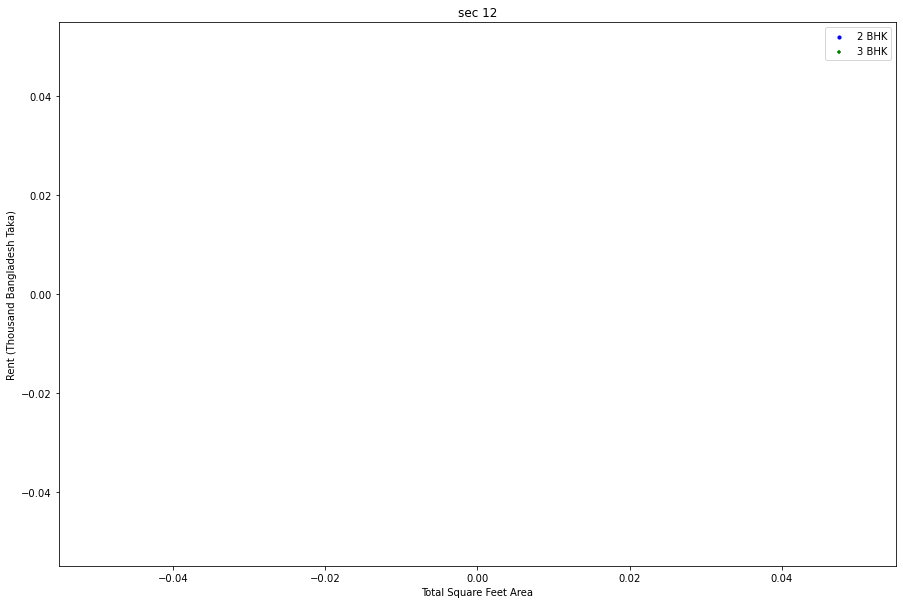

In [76]:
plot_scatter_chart(df6,'sec 12')

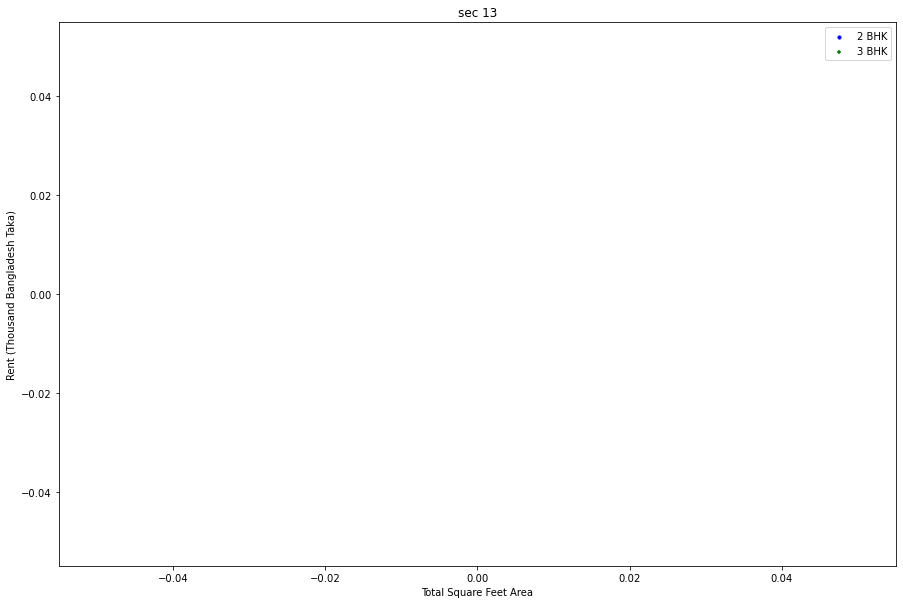

In [77]:
plot_scatter_chart(df6,'sec 13')

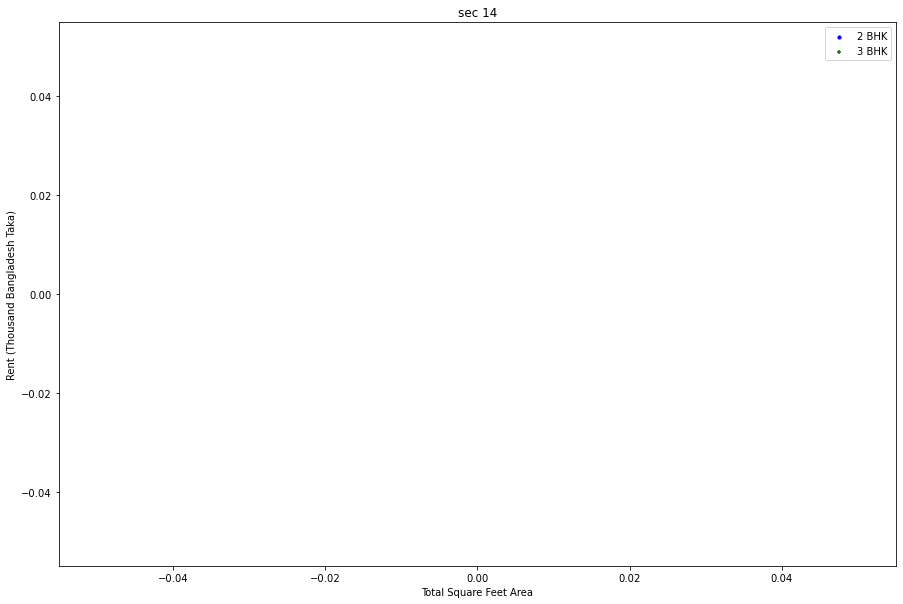

In [78]:
plot_scatter_chart(df6,'sec 14')

Text(0, 0.5, 'Count')

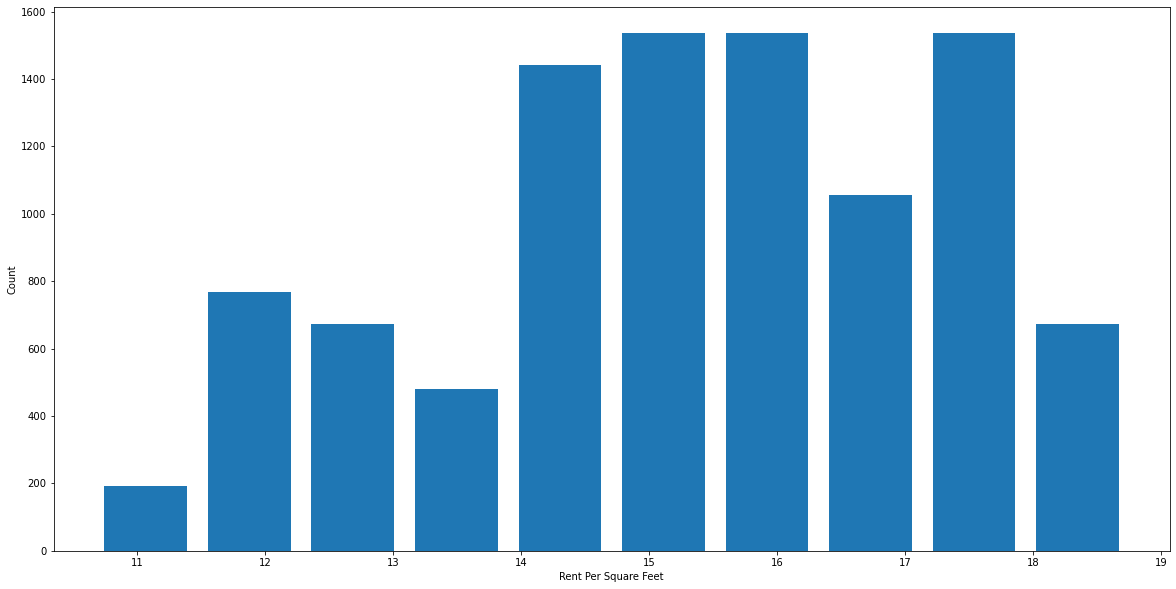

In [79]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.rent_per_sqft,rwidth=0.8)
plt.xlabel("Rent Per Square Feet")
plt.ylabel("Count")

In [80]:
df6.bath.unique()

array([3, 2, 1, 0, 5, 4], dtype=int64)

Text(0, 0.5, 'Count')

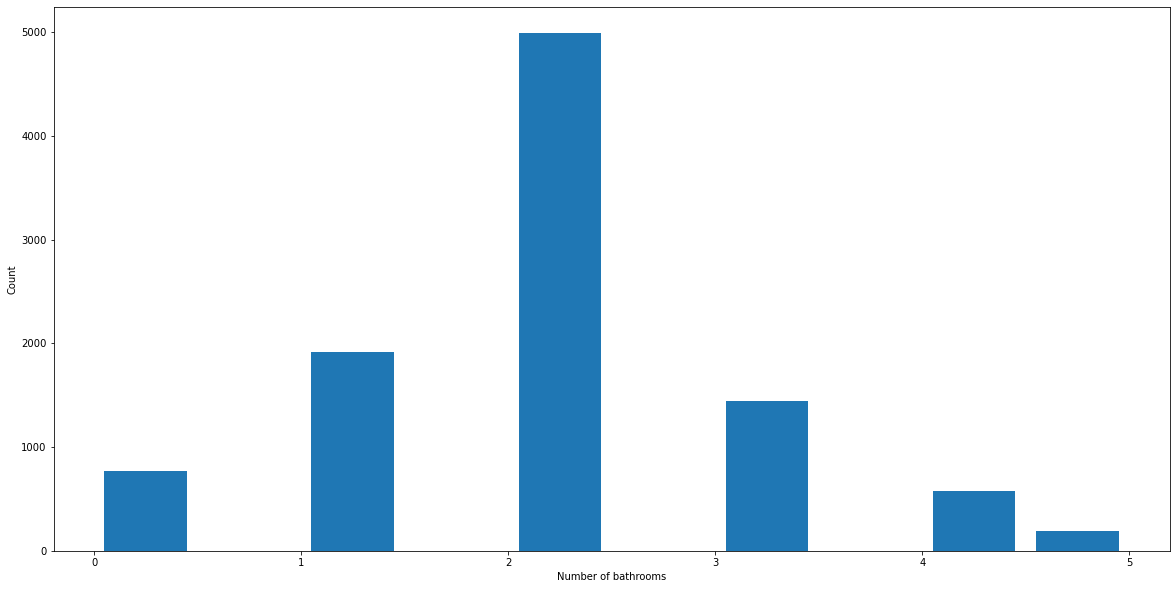

In [81]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [85]:
df6[df6.bath>4]

,location,size,total_sqft,bath,price,bhk,rent_per_sqft
10,sec 1,5 BHK,2450.0,5,40000,5,16.326531
21,sec 1,5 BHK,2450.0,5,40000,5,16.326531
32,sec 1,5 BHK,2450.0,5,40000,5,16.326531
43,sec 1,5 BHK,2450.0,5,40000,5,16.326531
54,sec 1,5 BHK,2450.0,5,40000,5,16.326531
...,...,...,...,...,...,...,...
9757,sec 8,5 BHK,2600.0,5,36000,5,13.846154
9765,sec 8,5 BHK,2600.0,5,36000,5,13.846154
9773,sec 8,5 BHK,2600.0,5,36000,5,13.846154
9781,sec 8,5 BHK,2600.0,5,36000,5,13.846154


In [91]:
dummies = pd.get_dummies(df6.location)
dummies.head(3)

,sec 1,sec 10,sec 11,sec 12,sec 13,sec 14,sec 2,sec 3,sec 4,sec 6,sec 7,sec 8,sec13
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
df12 = df6.drop('location',axis='columns')
df12.head(2)

,size,total_sqft,bath,price,bhk,rent_per_sqft
0,3 BHK,1200.0,3,20000,3,16.666667
1,2 BHK,825.0,2,14000,2,16.969697


In [98]:
df12.shape

(9888, 6)

In [99]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,size,total_sqft,bath,bhk,rent_per_sqft
0,3 BHK,1200.0,3,3,16.666667
1,2 BHK,825.0,2,2,16.969697
2,2 BHK,800.0,2,2,16.250000


In [100]:
X.shape

(9888, 5)

In [109]:
y=df12.price
y.head(3)

0    20000
1    14000
2    13000
Name: price, dtype: int64

In [113]:
len(y)

9888

In [114]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [116]:
from sklearn.linear_model import LinearRegression
try:
    lr_clf = LinearRegression()
    lr_clf.fit(X_train,y_train)
    lr_clf.score(X_test,y_test)
except:
    print("Nothing")

Nothing


In [118]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

try:
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    cross_val_score(LinearRegression(), X, y, cv=cv)
except:
    print("Nothing")

G:\Program Files\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "G:\Program Files\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "G:\Program Files\lib\site-packages\sklearn\linear_model\_base.py", line 505, in fit
    X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc', 'coo'],
  File "G:\Program Files\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "G:\Program Files\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "G:\Program Files\lib\site-packages\sklearn\utils\validation.py", line 795, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "G:\Program Files\lib\sit

In [119]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

G:\Program Files\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "G:\Program Files\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "G:\Program Files\lib\site-packages\sklearn\linear_model\_base.py", line 505, in fit
    X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc', 'coo'],
  File "G:\Program Files\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "G:\Program Files\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "G:\Program Files\lib\site-packages\sklearn\utils\validation.py", line 795, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "G:\Program Files\lib\sit

ValueError: could not convert string to float: '3 BHK'

In [120]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [122]:
predict_price('sec 2',1000, 2, 3)

IndexError: index 0 is out of bounds for axis 0 with size 0